In [1]:
# mportts
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import env
import wrangle
from sklearn.model_selection import train_test_split

import sklearn.preprocessing

In [2]:
df = wrangle.get_telco_data()

In [3]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [5]:
df = wrangle.clean_telco(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


In [7]:
df.index = df.customer_id
df = df.drop(columns='customer_id')
df.head()

,monthly_charges,tenure,total_charges
customer_id,,,
0013-SMEOE,109.70,71,7904.25
0014-BMAQU,84.65,63,5377.80
0016-QLJIS,90.45,65,5957.90
0017-DINOC,45.20,54,2460.55
0017-IUDMW,116.80,72,8456.75


In [8]:
train, validate, test = wrangle.split(df, stratify_by=None)

In [9]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
7501-IWUNG,73.80,61,4616.05
1303-SRDOK,69.05,55,3842.60
3967-VQOGC,24.90,67,1680.25
3777-XROBG,19.55,58,1079.65
5075-JSDKI,24.45,59,1493.10


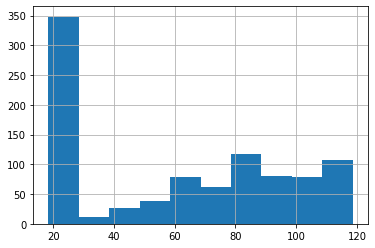

In [10]:
train.monthly_charges.hist()

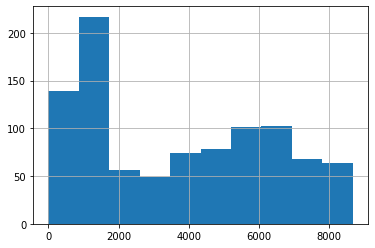

In [11]:
train.total_charges.hist()

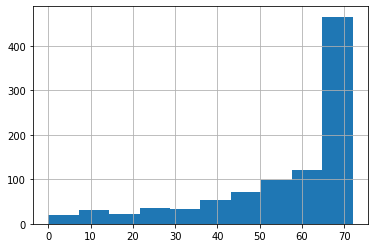

In [12]:
train.tenure.hist()

In [13]:
# Make the thing
scaler = sklearn.preprocessing.MinMaxScaler()

In [14]:
# We fit on the training data
# in a way, we treat our scalers like our ML models
# we only .fit on the training data
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [16]:
# turn the numpy arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

In [17]:
train_scaled.head()

,monthly_charges,tenure,total_charges
0,0.552618,0.847222,0.532410
1,0.505237,0.763889,0.443201
2,0.064838,0.930556,0.193798
3,0.011471,0.805556,0.124526
4,0.060349,0.819444,0.172213


In [18]:
x_train_scaled = scaler.inverse_transform(train)
x_validate_scaled = scaler.inverse_transform(validate)
x_test_scaled = scaler.inverse_transform(test)

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(train)

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.legend(train)

plt.show()